In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/Dataset_ML'
img_height, img_width = 64, 64

In [ ]:
def load_images_and_labels(dataset_dir):
    images = []
    labels = []
    class_names = os.listdir(dataset_dir)  # Get all the folder names (class labels)

    for class_name in class_names:
        class_path = os.path.join(dataset_dir, class_name)

        if os.path.isdir(class_path):

            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)

                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    img_resized = cv2.resize(img, (64, 64))
                    images.append(img_resized.flatten())  # Flatten the image into a 1D vector
                    labels.append(class_name)

    return np.array(images), np.array(labels)


In [ ]:
X, y = load_images_and_labels(data_dir)


In [ ]:
X = X / 255.0

In [ ]:
# Encode the labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)


In [ ]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
accuracy = knn.score(X_test, y_test)
print(f"KNN Model Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

KNN Model Accuracy: 0.5761

Classification Report:
                    precision    recall  f1-score   support

       0. Cut Shot       0.58      0.45      0.51       129
    1. Cover Drive       0.43      0.64      0.52       120
 2. Straight Drive       0.71      0.57      0.64       120
      3. Pull Shot       0.57      0.44      0.50       120
4. Leg Glance Shot       0.56      0.72      0.63       120
     5. Scoop Shot       0.72      0.63      0.67       120

          accuracy                           0.58       729
         macro avg       0.60      0.58      0.58       729
      weighted avg       0.60      0.58      0.58       729


Confusion Matrix:
[[58 30  4  8 17 12]
 [ 9 77  8  8 11  7]
 [ 8 19 69 10  9  5]
 [17 29  9 53 10  2]
 [ 7 11  6  5 87  4]
 [ 1 12  1  9 21 76]]


In [26]:
categories = ['Cut Shot', 'Cover Drive', 'Straight Drive', 'Pull Shot', 'Leg Glance Shot', 'Scoop Shot']



Confusion Matrix:
[[58 30  4  8 17 12]
 [ 9 77  8  8 11  7]
 [ 8 19 69 10  9  5]
 [17 29  9 53 10  2]
 [ 7 11  6  5 87  4]
 [ 1 12  1  9 21 76]]


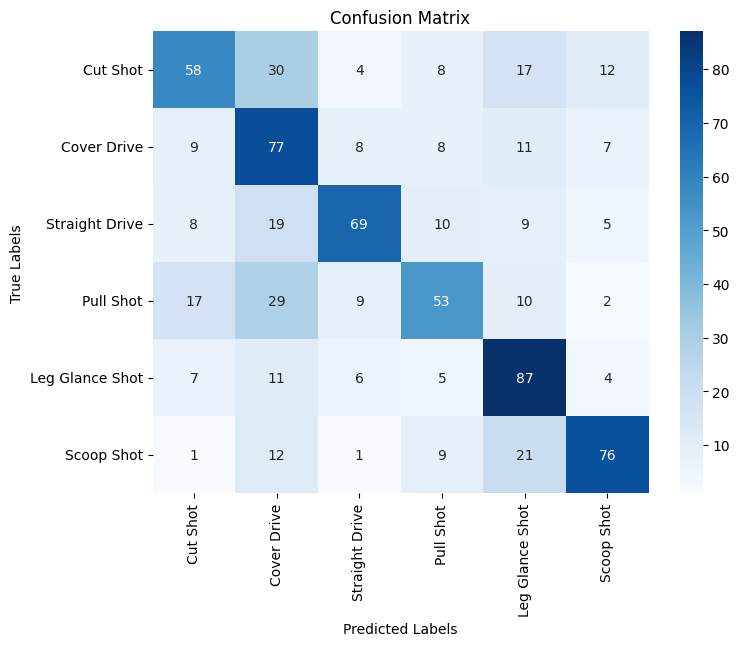

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you already have your predictions (y_pred) and true labels (y_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in a cleaner format
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

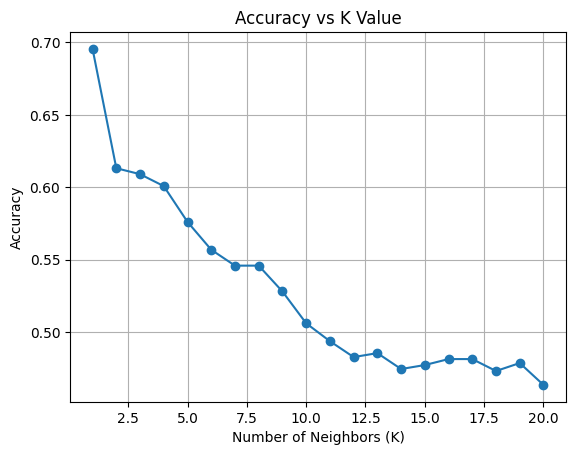

In [ ]:
k_values = range(1,21)  # K values from 1 to 20
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


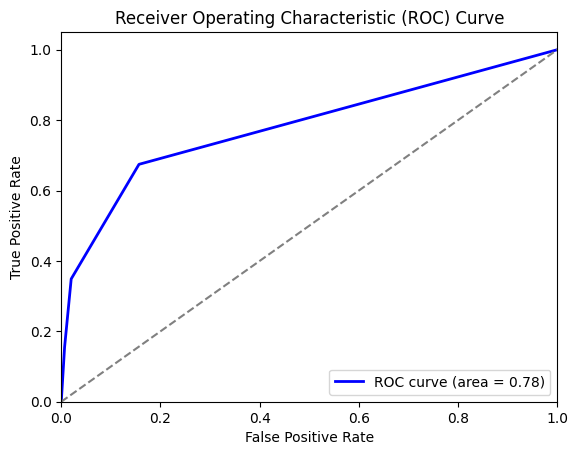

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the value of k
knn_model.fit(X_train, y_train)

# Binarize the labels for multi-class classification (if needed)
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])  # Adjust for your classes

# Predict the probabilities for each class
y_pred_prob = knn_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_bin[:, 0], y_pred_prob[:, 0])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
